In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Wczytanie danych

In [3]:
import pandas as pd


bike_rental_data = pd.read_csv("bike_rentals.csv")

### Preprocessing – usuwanie niepotrzebnych kolumn

In [4]:
bike_rental_data.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,2011-01-01,1,0,1,0,Sunday,0,Few clouds,8.520016,0.363625,4216.772720,0.160446,985
1,2,2011-01-02,1,0,1,0,Monday,0,Few clouds,9.446944,0.353739,2347.762125,0.248539,801
2,3,2011-01-03,1,0,1,0,Tuesday,1,Clear,1.425472,0.189405,365.603756,0.248309,1349
3,4,2011-01-04,1,0,1,0,Wednesday,1,Clear,1.600000,0.212122,1215.313649,0.160296,1562
4,5,2011-01-05,1,0,1,0,Thursday,1,Clear,2.893936,0.229270,364.548071,0.186900,1600
5,6,2011-01-06,1,0,1,0,Friday,1,NaN,1.808704,0.233209,721.429862,0.089565,1606
6,7,2011-01-07,1,0,1,0,Saturday,1,Few clouds,1.433056,0.208839,618.505462,0.168726,1510
7,8,2011-01-08,1,0,1,0,Sunday,0,Few clouds,-0.080000,0.162254,824.361739,0.266804,959
8,9,2011-01-09,1,0,1,0,Monday,0,Clear,-1.360016,0.116175,355.326209,0.361950,822
9,10,2011-01-10,1,0,1,0,Tuesday,1,Clear,-0.760016,0.150888,543.863579,0.223267,1321


In [5]:
bike_rental_data.drop(["instant"], inplace=False, axis=1).head(10)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2011-01-01,1,0,1,0,Sunday,0,Few clouds,8.520016,0.363625,4216.772720,0.160446,985
1,2011-01-02,1,0,1,0,Monday,0,Few clouds,9.446944,0.353739,2347.762125,0.248539,801
2,2011-01-03,1,0,1,0,Tuesday,1,Clear,1.425472,0.189405,365.603756,0.248309,1349
3,2011-01-04,1,0,1,0,Wednesday,1,Clear,1.600000,0.212122,1215.313649,0.160296,1562
4,2011-01-05,1,0,1,0,Thursday,1,Clear,2.893936,0.229270,364.548071,0.186900,1600
5,2011-01-06,1,0,1,0,Friday,1,NaN,1.808704,0.233209,721.429862,0.089565,1606
6,2011-01-07,1,0,1,0,Saturday,1,Few clouds,1.433056,0.208839,618.505462,0.168726,1510
7,2011-01-08,1,0,1,0,Sunday,0,Few clouds,-0.080000,0.162254,824.361739,0.266804,959
8,2011-01-09,1,0,1,0,Monday,0,Clear,-1.360016,0.116175,355.326209,0.361950,822
9,2011-01-10,1,0,1,0,Tuesday,1,Clear,-0.760016,0.150888,543.863579,0.223267,1321


### Preprocessing – brakujące dane

In [6]:
bike_rental_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    object 
 7   workingday  731 non-null    int64  
 8   weathersit  694 non-null    object 
 9   temp        716 non-null    float64
 10  atemp       723 non-null    float64
 11  hum         726 non-null    float64
 12  windspeed   718 non-null    float64
 13  cnt         731 non-null    int64  
dtypes: float64(4), int64(7), object(3)
memory usage: 80.1+ KB


In [7]:
bike_rental_data_na = bike_rental_data.isna().any(axis=1)

In [8]:
bike_rental_data.loc[bike_rental_data_na]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
5,6,2011-01-06,1,0,1,0,Friday,1,NaN,1.808704,0.233209,721.429862,0.089565,1606
16,17,2011-01-17,1,0,1,1,Tuesday,0,NaN,NaN,0.176771,834.668213,0.194017,1000
18,19,2011-01-19,1,0,1,0,Thursday,1,Few clouds,NaN,0.298422,3026.944498,0.208317,1650
25,26,2011-01-26,1,0,1,0,Thursday,1,Partialy cloudy,2.440000,0.203600,5533.965088,NaN,506
30,31,2011-01-31,1,0,1,0,Tuesday,1,Few clouds,48.679984,0.186250,1328.705018,NaN,1501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,708,2012-12-08,4,1,12,0,Sunday,0,NaN,10.320016,0.389508,6895.252355,0.101379,5582
719,720,2012-12-20,4,1,12,0,Friday,1,NaN,7.840000,0.335217,1990.169148,0.132463,4128
720,721,2012-12-21,1,1,12,0,Saturday,1,NaN,7.680016,0.301767,960.244672,0.374383,3623
721,722,2012-12-22,1,1,12,0,Sunday,0,NaN,4.759984,0.236113,379.086984,0.407346,1749


### Imputacja brakujących danych numerycznych

In [9]:
bike_rental_data[["windspeed"]]

,windspeed
0,0.160446
1,0.248539
2,0.248309
3,0.160296
4,0.186900
...,...
726,0.350133
727,0.155471
728,0.124383
729,0.350754


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn import set_config

set_config(transform_output="pandas")

In [11]:
from sklearn.impute import SimpleImputer

simple_Imputer = SimpleImputer(strategy="mean")

In [12]:
simple_Imputer.fit(bike_rental_data[["windspeed"]])

,"missing_values missing_values: int, float, str, np.nan, None or pandas.NA, default=np.nanThe placeholder for the missing values. All occurrences of`missing_values` will be imputed. For pandas' dataframes withnullable integer dtypes with missing values, `missing_values`can be set to either `np.nan` or `pd.NA`.",nan
,"strategy strategy: str or Callable, default='mean'The imputation strategy.- If ""mean"", then replace missing values using the mean along each column. Can only be used with numeric data.- If ""median"", then replace missing values using the median along each column. Can only be used with numeric data.- If ""most_frequent"", then replace missing using the most frequent value along each column. Can be used with strings or numeric data. If there is more than one such value, only the smallest is returned.- If ""constant"", then replace missing values with fill_value. Can be used with strings or numeric data.- If an instance of Callable, then replace missing values using the scalar statistic returned by running the callable over a dense 1d array containing non-missing values of each column... versionadded:: 0.20 strategy=""constant"" for fixed value imputation... versionadded:: 1.5 strategy=callable for custom value imputation.",'mean'
,"fill_value fill_value: str or numerical value, default=NoneWhen strategy == ""constant"", `fill_value` is used to replace alloccurrences of missing_values. For string or object data types,`fill_value` must be a string.If `None`, `fill_value` will be 0 when imputing numericaldata and ""missing_value"" for strings or object data types.",None
,"copy copy: bool, default=TrueIf True, a copy of X will be created. If False, imputation willbe done in-place whenever possible. Note that, in the following cases,a new copy will always be made, even if `copy=False`:- If `X` is not an array of floating values;- If `X` is encoded as a CSR matrix;- If `add_indicator=True`.",True
,"add_indicator add_indicator: bool, default=FalseIf True, a :class:`MissingIndicator` transform will stack onto outputof the imputer's transform. This allows a predictive estimatorto account for missingness despite imputation. If a feature has nomissing values at fit/train time, the feature won't appear onthe missing indicator even if there are missing values attransform/test time.",False
,"keep_empty_features keep_empty_features: bool, default=FalseIf True, features that consist exclusively of missing values when`fit` is called are returned in results when `transform` is called.The imputed value is always `0` except when `strategy=""constant""`in which case `fill_value` will be used instead... versionadded:: 1.2",False


In [13]:
simple_Imputer.transform(bike_rental_data[["windspeed"]]).head(30)

,windspeed
0,0.160446
1,0.248539
2,0.248309
3,0.160296
4,0.186900
5,0.089565
6,0.168726
7,0.266804
8,0.361950
9,0.223267


In [14]:
bike_rental_data["windspeed"] = simple_Imputer.transform(bike_rental_data[["windspeed"]])

In [15]:
bike_rental_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    object 
 7   workingday  731 non-null    int64  
 8   weathersit  694 non-null    object 
 9   temp        716 non-null    float64
 10  atemp       723 non-null    float64
 11  hum         726 non-null    float64
 12  windspeed   731 non-null    float64
 13  cnt         731 non-null    int64  
dtypes: float64(4), int64(7), object(3)
memory usage: 80.1+ KB


### Imputacja brakujących danych tekstowych

In [16]:
bike_rental_data[["weathersit"]]

,weathersit
0,Few clouds
1,Few clouds
2,Clear
3,Clear
4,Clear
...,...
726,Few clouds
727,Few clouds
728,Few clouds
729,NaN


In [17]:
simple__text_Imputer = SimpleImputer(strategy="most_frequent")

In [18]:
simple__text_Imputer.fit(bike_rental_data[["weathersit"]])

,"missing_values missing_values: int, float, str, np.nan, None or pandas.NA, default=np.nanThe placeholder for the missing values. All occurrences of`missing_values` will be imputed. For pandas' dataframes withnullable integer dtypes with missing values, `missing_values`can be set to either `np.nan` or `pd.NA`.",nan
,"strategy strategy: str or Callable, default='mean'The imputation strategy.- If ""mean"", then replace missing values using the mean along each column. Can only be used with numeric data.- If ""median"", then replace missing values using the median along each column. Can only be used with numeric data.- If ""most_frequent"", then replace missing using the most frequent value along each column. Can be used with strings or numeric data. If there is more than one such value, only the smallest is returned.- If ""constant"", then replace missing values with fill_value. Can be used with strings or numeric data.- If an instance of Callable, then replace missing values using the scalar statistic returned by running the callable over a dense 1d array containing non-missing values of each column... versionadded:: 0.20 strategy=""constant"" for fixed value imputation... versionadded:: 1.5 strategy=callable for custom value imputation.",'most_frequent'
,"fill_value fill_value: str or numerical value, default=NoneWhen strategy == ""constant"", `fill_value` is used to replace alloccurrences of missing_values. For string or object data types,`fill_value` must be a string.If `None`, `fill_value` will be 0 when imputing numericaldata and ""missing_value"" for strings or object data types.",None
,"copy copy: bool, default=TrueIf True, a copy of X will be created. If False, imputation willbe done in-place whenever possible. Note that, in the following cases,a new copy will always be made, even if `copy=False`:- If `X` is not an array of floating values;- If `X` is encoded as a CSR matrix;- If `add_indicator=True`.",True
,"add_indicator add_indicator: bool, default=FalseIf True, a :class:`MissingIndicator` transform will stack onto outputof the imputer's transform. This allows a predictive estimatorto account for missingness despite imputation. If a feature has nomissing values at fit/train time, the feature won't appear onthe missing indicator even if there are missing values attransform/test time.",False
,"keep_empty_features keep_empty_features: bool, default=FalseIf True, features that consist exclusively of missing values when`fit` is called are returned in results when `transform` is called.The imputed value is always `0` except when `strategy=""constant""`in which case `fill_value` will be used instead... versionadded:: 1.2",False


In [19]:
simple__text_Imputer.transform(bike_rental_data[["weathersit"]]).head(30)

,weathersit
0,Few clouds
1,Few clouds
2,Clear
3,Clear
4,Clear
5,Clear
6,Few clouds
7,Few clouds
8,Clear
9,Clear


In [20]:
bike_rental_data["weathersit"] = simple__text_Imputer.transform(bike_rental_data[["weathersit"]])

In [21]:
bike_rental_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    object 
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    object 
 9   temp        716 non-null    float64
 10  atemp       723 non-null    float64
 11  hum         726 non-null    float64
 12  windspeed   731 non-null    float64
 13  cnt         731 non-null    int64  
dtypes: float64(4), int64(7), object(3)
memory usage: 80.1+ KB


### Imputacja z wielu wartości

In [22]:
bike_rental_data_imperative = bike_rental_data.copy()

#### Imperative Imputer

In [23]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

numeric_cols_to_impute = ["temp", "atemp", "hum", "windspeed"]

iterative_imputer = IterativeImputer(random_state=42)

In [24]:
imputed_data_iterative = iterative_imputer.fit_transform(bike_rental_data_imperative[numeric_cols_to_impute])
imputed_data_iterative.columns = numeric_cols_to_impute 

bike_rental_data_imperative[numeric_cols_to_impute] = imputed_data_iterative

bike_rental_data_imperative.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    object 
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    object 
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  cnt         731 non-null    int64  
dtypes: float64(4), int64(7), object(3)
memory usage: 80.1+ KB


#### KNN Imputer

In [25]:
from sklearn.impute import KNNImputer

numeric_cols_with_na = ["temp", "atemp", "hum", "windspeed"]

knn_imputer = KNNImputer(n_neighbors=5)

In [26]:
imputed_data_knn = knn_imputer.fit_transform(bike_rental_data[numeric_cols_with_na])

bike_rental_data[numeric_cols_with_na] = imputed_data_knn

bike_rental_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    object 
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    object 
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  cnt         731 non-null    int64  
dtypes: float64(4), int64(7), object(3)
memory usage: 80.1+ KB


### Preprocessing – dane tekstowe

In [27]:
weekday_data = bike_rental_data["weekday"]

print("Wartości i ich liczność w kolumnie 'weekday':")
weekday_counts = weekday_data.value_counts()
print(weekday_counts)

Wartości i ich liczność w kolumnie 'weekday':
weekday
Sunday       105
Monday       105
Tuesday      105
Wednesday    104
Thursday     104
Friday       104
Saturday     104
Name: count, dtype: int64


### Kodowanie One-Hot

In [28]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(sparse_output=False)

one_hot_encoder.fit(bike_rental_data[["weekday"]])


,"categories categories: 'auto' or a list of array-like, default='auto'Categories (unique values) per feature:- 'auto' : Determine categories automatically from the training data.- list : ``categories[i]`` holds the categories expected in the ith column. The passed categories should not mix strings and numeric values within a single feature, and should be sorted in case of numeric values.The used categories can be found in the ``categories_`` attribute... versionadded:: 0.20",'auto'
,"drop drop: {'first', 'if_binary'} or an array-like of shape (n_features,), default=NoneSpecifies a methodology to use to drop one of the categories perfeature. This is useful in situations where perfectly collinearfeatures cause problems, such as when feeding the resulting datainto an unregularized linear regression model.However, dropping one category breaks the symmetry of the originalrepresentation and can therefore induce a bias in downstream models,for instance for penalized linear classification or regression models.- None : retain all features (the default).- 'first' : drop the first category in each feature. If only one category is present, the feature will be dropped entirely.- 'if_binary' : drop the first category in each feature with two categories. Features with 1 or more than 2 categories are left intact.- array : ``drop[i]`` is the category in feature ``X[:, i]`` that should be dropped.When `max_categories` or `min_frequency` is configured to groupinfrequent categories, the dropping behavior is handled after thegrouping... versionadded:: 0.21 The parameter `drop` was added in 0.21... versionchanged:: 0.23 The option `drop='if_binary'` was added in 0.23... versionchanged:: 1.1 Support for dropping infrequent categories.",None
,"sparse_output sparse_output: bool, default=TrueWhen ``True``, it returns a :class:`scipy.sparse.csr_matrix`,i.e. a sparse matrix in ""Compressed Sparse Row"" (CSR) format... versionadded:: 1.2 `sparse` was renamed to `sparse_output`",False
,"dtype dtype: number type, default=np.float64Desired dtype of output.",<class 'numpy.float64'>
,"handle_unknown handle_unknown: {'error', 'ignore', 'infrequent_if_exist', 'warn'}, default='error'Specifies the way unknown categories are handled during :meth:`transform`.- 'error' : Raise an error if an unknown category is present during transform.- 'ignore' : When an unknown category is encountered during transform, the resulting one-hot encoded columns for this feature will be all zeros. In the inverse transform, an unknown category will be denoted as None.- 'infrequent_if_exist' : When an unknown category is encountered during transform, the resulting one-hot encoded columns for this feature will map to the infrequent category if it exists. The infrequent category will be mapped to the last position in the encoding. During inverse transform, an unknown category will be mapped to the category denoted `'infrequent'` if it exists. If the `'infrequent'` category does not exist, then :meth:`transform` and :meth:`inverse_transform` will handle an unknown category as with `handle_unknown='ignore'`. Infrequent categories exist based on `min_frequency` and `max_categories`. Read more in the :ref:`User Guide `.- 'warn' : When an unknown category is encountered during transform a warning is issued, and the encoding then proceeds as described for `handle_unknown=""infrequent_if_exist""`... versionchanged:: 1.1 `'infrequent_if_exist'` was added to automatically handle unknown categories and infrequent categories... versionadded:: 1.6 The option `""warn""` was added in 1.6.",'error'
,"min_frequency min_frequency: int or float, default=NoneSpecifies the minimum frequency below which a category will beconsidered infrequent.- If `int`, categories with a smaller cardinality will be considered infrequent.- If `float`, categories with a smaller cardinality than `min_frequency * n_samples` will be considered infrequent... versionadded:: 1.1 Read more in the :ref:`User Guide `.",None
,"max_categ

In [29]:
weekday_encoded = one_hot_encoder.transform(bike_rental_data[["weekday"]])

print(weekday_encoded.head())

   weekday_Friday  weekday_Monday  weekday_Saturday  weekday_Sunday  \
0             0.0             0.0               0.0             1.0   
1             0.0             1.0               0.0             0.0   
2             0.0             0.0               0.0             0.0   
3             0.0             0.0               0.0             0.0   
4             0.0             0.0               0.0             0.0   

   weekday_Thursday  weekday_Tuesday  weekday_Wednesday  
0               0.0              0.0                0.0  
1               0.0              0.0                0.0  
2               0.0              1.0                0.0  
3               0.0              0.0                1.0  
4               1.0              0.0                0.0  


In [30]:
print(one_hot_encoder.get_feature_names_out())

['weekday_Friday' 'weekday_Monday' 'weekday_Saturday' 'weekday_Sunday'
 'weekday_Thursday' 'weekday_Tuesday' 'weekday_Wednesday']


### Preprocessing – skalowanie

#### MinMaxScaler

In [31]:
from sklearn.preprocessing import MinMaxScaler

numeric_cols_to_scale = ["temp", "atemp", "hum", "windspeed"]

min_max_scaler = MinMaxScaler()

scaled_data_minmax = min_max_scaler.fit_transform(bike_rental_data[numeric_cols_to_scale])

print("Pierwsze 5 wierszy danych po skalowaniu (MinMaxScaler):")
print(scaled_data_minmax.head())

Pierwsze 5 wierszy danych po skalowaniu (MinMaxScaler):
       temp     atemp       hum  windspeed
0  0.108722  0.373517  0.471435   0.284606
1  0.116088  0.360541  0.262480   0.466215
2  0.052345  0.144830  0.040874   0.465740
3  0.053732  0.174649  0.135872   0.284297
4  0.064014  0.197158  0.040756   0.339143


#### StandardScaler

In [32]:
from sklearn.preprocessing import StandardScaler

numeric_cols_to_scale = ["temp", "atemp", "hum", "windspeed"]

standard_scaler = StandardScaler()

scaled_data_standard = standard_scaler.fit_transform(bike_rental_data[numeric_cols_to_scale])

print("Pierwsze 5 wierszy danych po skalowaniu (StandardScaler):")
print(scaled_data_standard.head())

Pierwsze 5 wierszy danych po skalowaniu (StandardScaler):
       temp     atemp       hum  windspeed
0 -0.787134 -0.678633  1.280988  -0.386954
1 -0.694775 -0.739337  0.179576   0.760014
2 -1.494037 -1.748425 -0.988515   0.757019
3 -1.476647 -1.608932 -0.487779  -0.388907
4 -1.347719 -1.503635 -0.989137  -0.042524


### Preprocessing – automatyzacja

#### Pipeline dla danych tekstowych

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

text_imputer = SimpleImputer(strategy="most_frequent")

text_one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")

text_pipeline = Pipeline([
    ("imputer", text_imputer),
    ("one_hot_encoder", text_one_hot_encoder)
])

print("Pipeline dla danych tekstowych:")
text_pipeline

Pipeline dla danych tekstowych:


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('imputer', ...), ('one_hot_encoder', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"missing_values missing_values: int, float, str, np.nan, None or pandas.NA, default=np.nanThe placeholder for the missing values. All occurrences of`missing_values` will be imputed. For pandas' dataframes withnullable integer dtypes with missing values, `missing_values`can be set to either `np.nan` or `pd.NA`.",nan
,"strategy strategy: str or Callable, default='mean'The imputation strategy.- If ""mean"", then replace missing values using the mean along each column. Can only be used with numeric data.- If ""median"", then replace missing values using the median along each column. Can only be used with numeric data.- If ""most_frequent"", then replace missing using the most frequent value along each column. Can be used with strings or numeric data. If there is more than one such value, only the smallest is returned.- If ""constant"", then replace missing values with fill_value. Can be used with strings or numeric data.- If an instance of Callable, then replace missing values using the scalar statistic returned by running the callable over a dense 1d array containing non-missing values of each column... versionadded:: 0.20 strategy=""constant"" for fixed value imputation... versionadded:: 1.5 strategy=callable for custom value imputation.",'most_frequent'
,"fill_value fill_value: str or numerical value, default=NoneWhen strategy == ""constant"", `fill_value` is used to replace alloccurrences of missing_values. For string or object data types,`fill_value` must be a string.If `None`, `fill_value` will be 0 when imputing numericaldata and ""missing_value"" for strings or object data types.",None
,"copy copy: bool, default=TrueIf True, a copy of X will be created. If False, imputation willbe done in-place whenever possible. Note that, in the following cases,a new copy will always be made, even if `copy=False`:- If `X` is not an array of floating values;- If `X` is encoded as a CSR matrix;- If `add_indicator=True`.",True
,"add_indicator add_indicator: bool, default=FalseIf True, a :class:`MissingIndicator` transform will stack onto outputof the imputer's transform. This allows a predictive estimatorto account for missingness despite im

#### Pipeline dla danych liczbowych

In [34]:
numeric_imputer = SimpleImputer(strategy="mean")

numeric_scaler = StandardScaler()

numeric_pipeline = Pipeline([
    ("imputer", numeric_imputer),
    ("scaler", numeric_scaler)
])

print("Pipeline dla danych numerycznych:")
numeric_pipeline

Pipeline dla danych numerycznych:


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('imputer', ...), ('scaler', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"missing_values missing_values: int, float, str, np.nan, None or pandas.NA, default=np.nanThe placeholder for the missing values. All occurrences of`missing_values` will be imputed. For pandas' dataframes withnullable integer dtypes with missing values, `missing_values`can be set to either `np.nan` or `pd.NA`.",nan
,"strategy strategy: str or Callable, default='mean'The imputation strategy.- If ""mean"", then replace missing values using the mean along each column. Can only be used with numeric data.- If ""median"", then replace missing values using the median along each column. Can only be used with numeric data.- If ""most_frequent"", then replace missing using the most frequent value along each column. Can be used with strings or numeric data. If there is more than one such value, only the smallest is returned.- If ""constant"", then replace missing values with fill_value. Can be used with strings or numeric data.- If an instance of Callable, then replace missing values using the scalar statistic returned by running the callable over a dense 1d array containing non-missing values of each column... versionadded:: 0.20 strategy=""constant"" for fixed value imputation... versionadded:: 1.5 strategy=callable for custom value imputation.",'mean'
,"fill_value fill_value: str or numerical value, default=NoneWhen strategy == ""constant"", `fill_value` is used to replace alloccurrences of missing_values. For string or object data types,`fill_value` must be a string.If `None`, `fill_value` will be 0 when imputing numericaldata and ""missing_value"" for strings or object data types.",None
,"copy copy: bool, default=TrueIf True, a copy of X will be created. If False, imputation willbe done in-place whenever possible. Note that, in the following cases,a new copy will always be made, even if `copy=False`:- If `X` is not an array of floating values;- If `X` is encoded as a CSR matrix;- If `add_indicator=True`.",True
,"add_indicator add_indicator: bool, default=FalseIf True, a :class:`MissingIndicator` transform will stack onto outputof the imputer's transform. This allows a predictive estimatorto account for missingness despite imputation. If a fea

#### ColumnTransformer

In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer

categorical_features = ["weekday", "weathersit"]
numerical_features = ["temp", "atemp", "hum", "windspeed"]

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", text_pipeline, categorical_features),
        ("num", numeric_pipeline, numerical_features),
    ] 
)

print("Preprocessor łączący oba pipeline'y:")
preprocessor

Preprocessor łączący oba pipeline'y:


,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('cat', ...), ('num', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse matrices,these will be stacked as a sparse matrix if the overall density islower than this value. Use ``sparse_threshold=0`` to always returndense. When the transformed output consists of all dense data, thestacked result will be dense, and this keyword will be ignored.",0.3
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"transformer_weights transformer_weights: dict, default=NoneMultiplicative weights for features per transformer. The output of thetransformer is multiplied by these weights. Keys are transformer names,values the weights.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each transformer will beprinted as it is completed.",False
,"verbose_feature_names_out verbose_feature_names_out: bool, str or Callable[[str, str], str], default=True- If True, :meth:`ColumnTransformer.get_feature_names_out` will prefix all feature names with the name of the transformer that generated that feature. It is equivalent to setting `verbose_feature_names_out=""{transformer_name}__{feature_name}""`.- If False, :meth:`ColumnTransformer.get_feature_names_out` will not prefix any feature names and will error if feature names are not unique.- If ``Callable[[str, str], str]``, :meth:`ColumnTransformer.get_feature_names_out` will rename all the features using the name of the transformer. The first argument of the callable is the transformer name and the second argument is the feature name. The returned string will be the new feature name.- If ``str``, it must be a string ready for formatting. The given string will be formatted using two field names: ``transformer_name`` and ``feature_name``. e.g. `

#### Podział na cechy i etykiety

In [36]:
X = bike_rental_data.drop(["cnt", "instant"], axis=1)

y = bike_rental_data["cnt"].copy()


#### Podział danych na zbiory treningowe i testowe

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Dostosowanie ColumnTransformera do cech ze zbioru treningowego  i przekształcenie cech z obu zbiorów

In [38]:
preprocessor.fit(X_train)

print("ColumnTransformer został pomyślnie dopasowany do X_train.")

preprocessor

ColumnTransformer został pomyślnie dopasowany do X_train.


,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('cat', ...), ('num', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse matrices,these will be stacked as a sparse matrix if the overall density islower than this value. Use ``sparse_threshold=0`` to always returndense. When the transformed output consists of all dense data, thestacked result will be dense, and this keyword will be ignored.",0.3
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"transformer_weights transformer_weights: dict, default=NoneMultiplicative weights for features per transformer. The output of thetransformer is multiplied by these weights. Keys are transformer names,values the weights.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each transformer will beprinted as it is completed.",False
,"verbose_feature_names_out verbose_feature_names_out: bool, str or Callable[[str, str], str], default=True- If True, :meth:`ColumnTransformer.get_feature_names_out` will prefix all feature names with the name of the transformer that generated that feature. It is equivalent to setting `verbose_feature_names_out=""{transformer_name}__{feature_name}""`.- If False, :meth:`ColumnTransformer.get_feature_names_out` will not prefix any feature names and will error if feature names are not unique.- If ``Callable[[str, str], str]``, :meth:`ColumnTransformer.get_feature_names_out` will rename all the features using the name of the transformer. The first argument of the callable is the transformer name and the second argument is the feature name. The returned string will be the new feature name.- If ``str``, it must be a string ready for formatting. The given string will be formatted using two field names: ``transformer_name`` and ``feature_name``. e.g. `

In [39]:
X_train_prepared = preprocessor.transform(X_train)

X_train_prepared

,cat__weekday_Friday,cat__weekday_Monday,cat__weekday_Saturday,cat__weekday_Sunday,cat__weekday_Thursday,cat__weekday_Tuesday,cat__weekday_Wednesday,cat__weathersit_Clear,cat__weathersit_Few clouds,cat__weathersit_Partialy cloudy,num__temp,num__atemp,num__hum,num__windspeed
682,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.816292,-0.960938,-0.085864,1.973548
250,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.587620,0.476590,3.387173,0.029980
336,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.029676,-1.039095,-0.393947,-1.232310
260,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.023133,0.075160,0.152250,-0.155722
543,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.894835,1.005631,-1.130583,1.058757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.618132,-0.608789,-0.771736,1.043513
106,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.268729,-0.202523,-0.916673,1.471703
270,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.592872,0.599185,1.844563,-0.544363
435,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.727365,-0.735249,-0.923482,0.418426


In [40]:
X_test_prepared = preprocessor.transform(X_test)

X_test_prepared

,cat__weekday_Friday,cat__weekday_Monday,cat__weekday_Saturday,cat__weekday_Sunday,cat__weekday_Thursday,cat__weekday_Tuesday,cat__weekday_Wednesday,cat__weathersit_Clear,cat__weathersit_Few clouds,cat__weathersit_Partialy cloudy,num__temp,num__atemp,num__hum,num__windspeed
703,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-0.176130,-0.057876,0.487298,-0.212403
33,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.571809,-1.861016,-1.012385,1.136566
300,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.876685,-0.988266,-0.532230,0.508146
456,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.417700,-0.378449,0.009004,-0.236642
633,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.182202,0.407344,-0.604670,0.597216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.884734,-0.945302,-0.489593,0.394837
192,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.361874,1.615498,-0.650877,0.127694
328,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.663296,-0.605198,-0.212568,-1.191792
165,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,5.384026,0.677187,-0.936860,-0.293336


#### Wyszkolenie modelu na zbiorze treningowym

In [41]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()

linear_reg.fit(X_train_prepared, y_train)

print("Model LinearRegression został pomyślnie wytrenowany.")

Model LinearRegression został pomyślnie wytrenowany.


#### Ocena wyszkolonego modelu

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np

y_pred = linear_reg.predict(X_test_prepared)

mae = mean_absolute_error(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred) *100

print("--- Wyniki Oceny Modelu LinearRegression ---")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

--- Wyniki Oceny Modelu LinearRegression ---
Mean Absolute Error (MAE): 1162.56
Root Mean Squared Error (RMSE): 1378.52
Mean Absolute Percentage Error (MAPE): 86.15%


#### Funkcja do automatycznego testowania wybranych metryk

In [43]:
def test_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    
    mse = mean_squared_error(y_true, y_pred)
    
    rmse = np.sqrt(mse)
    
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100
    
    return {
        "MAE": mae,
        "RMSE": rmse,
        "MAPE": mape
    }

y_pred = linear_reg.predict(X_test_prepared)
metrics = test_metrics(y_test, y_pred)

print("\n--- Wyniki Oceny Modelu ---")
print(f"MAE: {metrics['MAE']:.2f}")
print(f"RMSE: {metrics['RMSE']:.2f}")
print(f"MAPE: {metrics['MAPE']:.2f}%")


--- Wyniki Oceny Modelu ---
MAE: 1162.56
RMSE: 1378.52
MAPE: 86.15%


### Korelacje

#### Wykres cech względem siebie

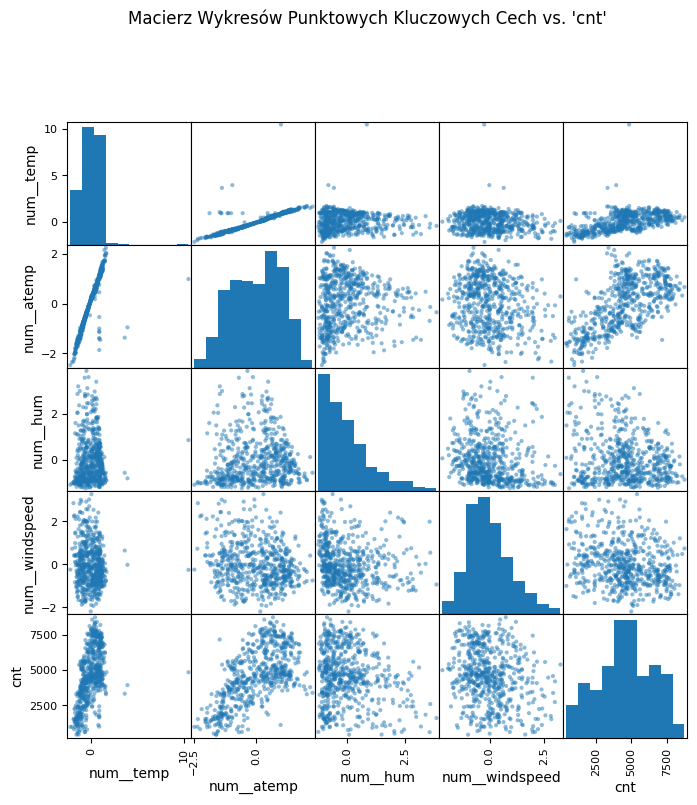

In [44]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

X_visual = X_train_prepared.drop(columns=[col for col in X_train_prepared.columns if 'cat__' in col])

X_visual['cnt'] = y_train.values

attributes = X_visual.columns
scatter_matrix(X_visual[attributes], figsize=(8, 8)) 
plt.suptitle("Macierz Wykresów Punktowych Kluczowych Cech vs. 'cnt'", y=1.02)
plt.show()

#### Pozbywanie się outlierów

In [45]:
# from sklearn.ensemble import IsolationForest
# from pandas.plotting import scatter_matrix
# import matplotlib.pyplot as plt

# iso_forest = IsolationForest(
#     contamination=0.01,
#     random_state=42,
# )

# outlier_predictions = iso_forest.fit_predict(X_train_prepared)

# outlier_mask = (outlier_predictions == -1)

# X_train_clean_iso = X_train_prepared[~outlier_mask].copy()
# y_train_clean_iso = y_train[~outlier_mask].copy()

# print(f"\nLiczba wierszy przed usunięciem outlierów: {X_train_prepared.shape[0]}")
# print(f"Liczba usuniętych outlierów (Isolation Forest): {outlier_mask.sum()}")
# print(f"Liczba wierszy po usunięciu outlierów: {X_train_clean_iso.shape[0]}")


In [46]:
# X_visual_clean_iso = X_train_clean_iso.drop(
#     columns=[col for col in X_train_clean_iso.columns if 'cat__' in col]
# ).copy()

# X_visual_clean_iso['cnt'] = y_train_clean_iso.values


# scatter_matrix(X_visual_clean_iso, figsize=(8, 8))
# plt.suptitle("Macierz Wykresów Punktowych PO Usunięciu Outlierów (Isolation Forest)", y=1.02)
# plt.show()

#### Macierz Korelacji

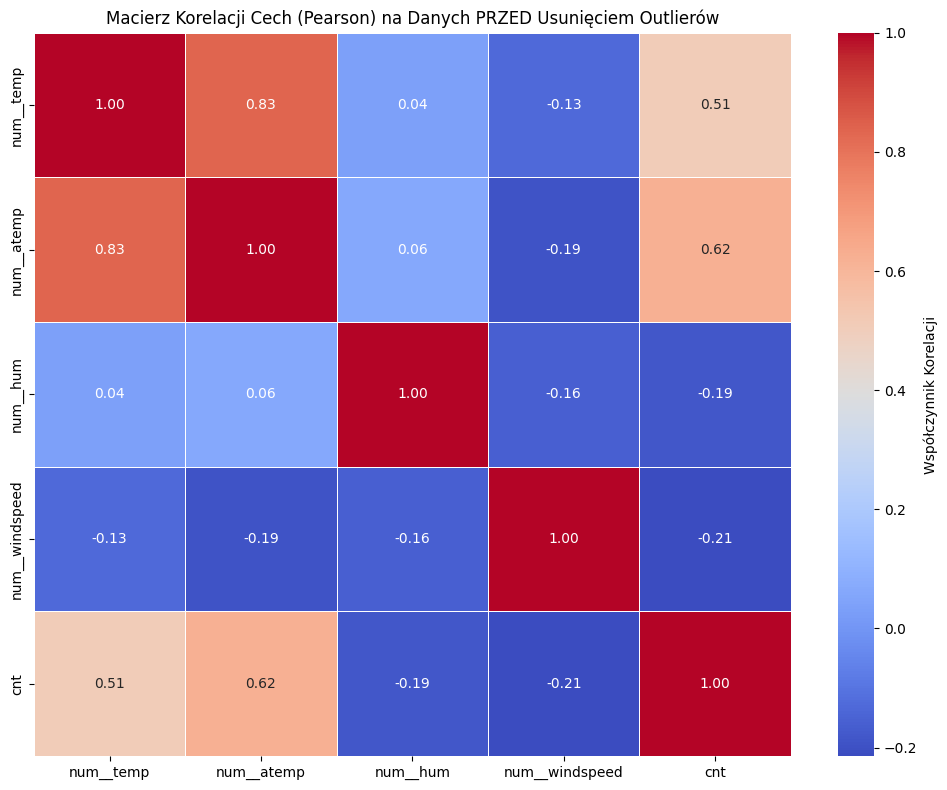


--- Sprawdzenie związków nieliniowych ---
Współczynnik korelacji Pearsona (wyświetlony w tabeli i na heatmapie) mierzy tylko związki liniowe. 
Aby sprawdzić związki nieliniowe, należy przeanalizować wykresy punktowe (scatter plots) i poszukać wzorców innych niż prosta.
correlation_heatmap_prepared.png


In [47]:
X_corr_prepared = X_train_prepared.drop(
    columns=[col for col in X_train_prepared.columns if 'cat__' in col]
).copy()

X_corr_prepared['cnt'] = y_train.values

correlation_matrix = X_corr_prepared.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix, 
    annot=True,              
    cmap='coolwarm',         
    fmt=".2f",               
    linewidths=.5,           
    cbar_kws={'label': 'Współczynnik Korelacji'}
)
plt.title('Macierz Korelacji Cech (Pearson) na Danych PRZED Usunięciem Outlierów')
plt.tight_layout()
plt.show()


print("\n--- Sprawdzenie związków nieliniowych ---")
print("Współczynnik korelacji Pearsona (wyświetlony w tabeli i na heatmapie) mierzy tylko związki liniowe. ")
print("Aby sprawdzić związki nieliniowe, należy przeanalizować wykresy punktowe (scatter plots) i poszukać wzorców innych niż prosta.")
print("correlation_heatmap_prepared.png")

#### Dodanie nowej cechy i sprawdzenie korelacji między cechami

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ORIGINAL_FEATURE = 'num__atemp'
NEW_FEATURE = 'atemp_squared'

df_corr = pd.DataFrame({
    'cnt': y_train.values,
    'atemp_original': X_train_prepared[ORIGINAL_FEATURE].values
})

df_corr[NEW_FEATURE] = df_corr['atemp_original'] ** 2

correlation_matrix = df_corr.corr()

print("## Korelacja Cech z Liczbą Wypożyczeń ('cnt')")
print("---")
print(f"* **Oryginalna cecha ('{ORIGINAL_FEATURE}')**: {correlation_matrix.loc['cnt', 'atemp_original']:.4f}")
print(f"* **Nowa cecha ('{NEW_FEATURE}')**: {correlation_matrix.loc['cnt', NEW_FEATURE]:.4f}")
print("\n")

print("### Pełna Macierz Korelacji (Wybrane Cechy)")
print(correlation_matrix.to_markdown())

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.regplot(x='atemp_original', y='cnt', data=df_corr, scatter_kws={'alpha':0.3})
plt.title("Oryginalna $a_{temp}$ vs. Wypożyczenia")
plt.subplot(1, 2, 2)
sns.regplot(x=NEW_FEATURE, y='cnt', data=df_corr, scatter_kws={'alpha':0.3})
plt.title("$a_{temp}^2$ vs. Wypożyczenia")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix, 
    annot=True,              
    cmap='coolwarm',         
    fmt=".2f",               
    linewidths=.5,           
    cbar_kws={'label': 'Współczynnik Korelacji'}
)
plt.title("Macierz Korelacji dla Wybranych Cech")
plt.show()

## Korelacja Cech z Liczbą Wypożyczeń ('cnt')
---
* **Oryginalna cecha ('num__atemp')**: 0.6240
* **Nowa cecha ('atemp_squared')**: -0.3598


### Pełna Macierz Korelacji (Wybrane Cechy)


ImportError: Missing optional dependency 'tabulate'.  Use pip or conda to install tabulate.

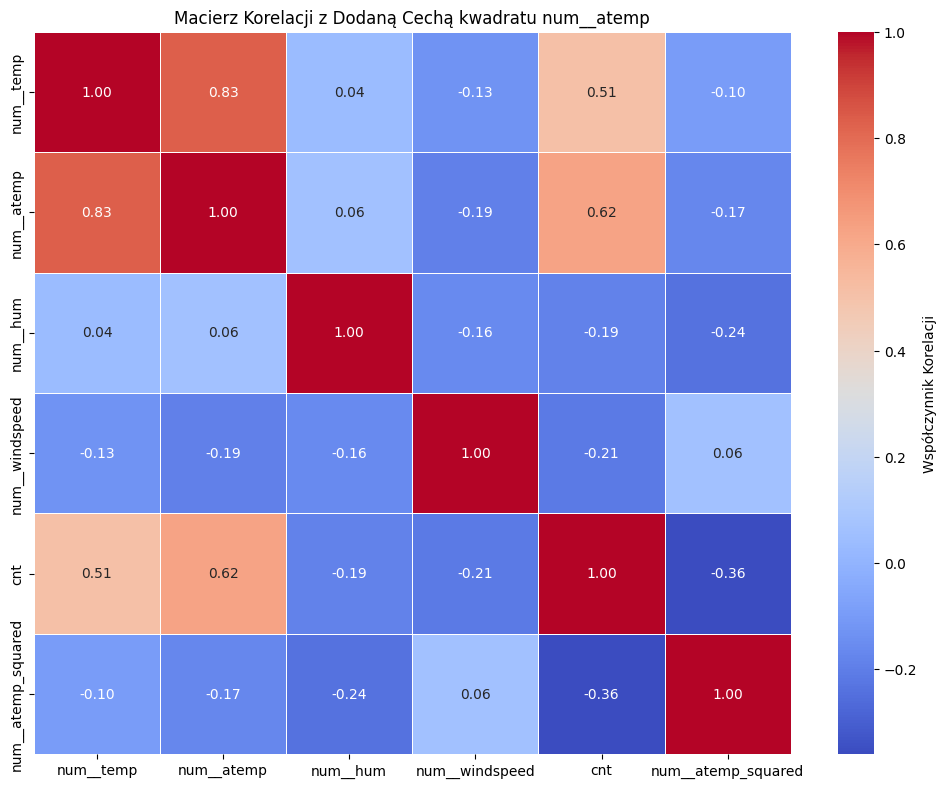

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

X_num_train_prepared = X_train_prepared[['num__temp', 'num__atemp', 'num__hum', 'num__windspeed']].copy()
X_num_train_prepared['cnt'] = y_train.values

X_num_train_prepared['num__atemp_squared'] = X_num_train_prepared['num__atemp'] ** 2

correlation_matrix_full = X_num_train_prepared.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix_full,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5,
    cbar_kws={'label': 'Współczynnik Korelacji'}
)
plt.title('Macierz Korelacji z Dodaną Cechą kwadratu num__atemp')
plt.tight_layout()
plt.show()


#### Przeskalowanie nowej cechy i dodanie jej do DataFrame

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

ORIGINAL_FEATURE = 'num__atemp'
NEW_FEATURE = 'num__atemp_squared'
SCALED_NEW_FEATURE = f'{NEW_FEATURE}_scaled'

X_train_extended = X_train_prepared.copy()
X_test_extended = X_test_prepared.copy()

X_train_extended[NEW_FEATURE] = X_train_extended[ORIGINAL_FEATURE] ** 2
X_test_extended[NEW_FEATURE] = X_test_extended[ORIGINAL_FEATURE] ** 2

scaler_new_feature = StandardScaler()

scaled_values_train_df = scaler_new_feature.fit_transform(X_train_extended[[NEW_FEATURE]])
scaled_values_train_flat = scaled_values_train_df.values.flatten()

scaled_values_test_df = scaler_new_feature.transform(X_test_extended[[NEW_FEATURE]])
scaled_values_test_flat = scaled_values_test_df.values.flatten()

X_train_extended[SCALED_NEW_FEATURE] = scaled_values_train_flat
X_test_extended[SCALED_NEW_FEATURE] = scaled_values_test_flat

X_train_extended = X_train_extended.drop(columns=[NEW_FEATURE])
X_test_extended = X_test_extended.drop(columns=[NEW_FEATURE])


if X_train_extended.isnull().values.any() or X_test_extended.isnull().values.any():
    print("\n\u274C BŁĄD: Wykryto wartości NaN. Sprawdź krok 1 i proces imputacji.")
else:
    print("\u2705 Weryfikacja powiodła się: Brak wartości NaN w końcowych zestawach danych.")
    print(f"Pomyślnie dodano i przeskalowano cechę '{NEW_FEATURE}' do zbiorów treningowego i testowego.")
    print(f"Liczba cech w X_train_extended: {X_train_extended.shape[1]}")
    print("\nPierwsze 5 wierszy rozszerzonego zbioru treningowego (wybrane kolumny):")
    print(X_train_extended[['num__atemp', SCALED_NEW_FEATURE]].head())

    linear_reg_extended = LinearRegression()
    linear_reg_extended.fit(X_train_extended, y_train)

    y_pred_extended = linear_reg_extended.predict(X_test_extended)
    metrics_extended = test_metrics(y_test, y_pred_extended)

    original_metrics = {
        "MAE": 1162.56,
        "RMSE": 1378.52,
        "MAPE": 86.15
    }

    print("\n--- Porównanie Wyników ---")
    print("| Metryka | Model Oryginalny | Model Rozszerzony (z $a_{temp}^2$) | Różnica (Poprawa) |")
    print("|:---|:---:|:---:|:---:|")
print(f"| **MAE** | {original_metrics['MAE']:.2f} | {metrics_extended['MAE']:.2f} | {original_metrics['MAE'] - metrics_extended['MAE']:.2f} |")
print(f"| **RMSE** | {original_metrics['RMSE']:.2f} | {metrics_extended['RMSE']:.2f} | {original_metrics['RMSE'] - metrics_extended['RMSE']:.2f} |")
print(f"| **MAPE** | {original_metrics['MAPE']:.2f}% | {metrics_extended['MAPE']:.2f}% | {original_metrics['MAPE'] - metrics_extended['MAPE']:.2f}% |")

✅ Weryfikacja powiodła się: Brak wartości NaN w końcowych zestawach danych.
Pomyślnie dodano i przeskalowano cechę 'num__atemp_squared' do zbiorów treningowego i testowego.
Liczba cech w X_train_extended: 15

Pierwsze 5 wierszy rozszerzonego zbioru treningowego (wybrane kolumny):
     num__atemp  num__atemp_squared_scaled
682   -0.960938                  -0.074381
250    0.476590                  -0.750500
336   -1.039095                   0.077413
260    0.075160                  -0.965581
543    1.005631                   0.010967

--- Porównanie Wyników ---
| Metryka | Model Oryginalny | Model Rozszerzony (z $a_{temp}^2$) | Różnica (Poprawa) |
|:---|:---:|:---:|:---:|
| **MAE** | 1162.56 | 1141.25 | 21.31 |
| **RMSE** | 1378.52 | 1343.33 | 35.19 |
| **MAPE** | 86.15% | 97.76% | -11.61% |
